<a href="https://colab.research.google.com/github/firas-chakroun/Formation/blob/main/Data_Analysis_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Exploratory Data Analysis

### What are the main characteristics which have the most impact on the car price?

## 1. Import Data from Module 2

#### Setup

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'

df = pd.read_csv(path)
df.head()

ParserError: Error tokenizing data. C error: Expected 3 fields in line 28, saw 9


## 2. Analyze Individual Feature Patterns using Visualization

In [ ]:
# Import visualization packages Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### How to choose the right visualization method?

When visualizing individual variables, it is important to first understand what type the variable is in order to find the right visualization method for that variable.

In [ ]:
# list the data types for each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>What is the data type of the colunm "peak-rpm"? </b>
</div>

  <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1" class="collapse">
```
float64
```
</div>


In [ ]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b> Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.
<br>Hint: if you would like to select those columns  use the following syntax: df[['bore','stroke' ,'compression-ratio','horsepower']]</bbr>  </b>
</div>

In [ ]:
df[['bore','stroke','compression-ratio','horsepower']].corr

<bound method DataFrame.corr of      bore stroke  compression-ratio horsepower
0    3.47   2.68                9.0        111
1    3.47   2.68                9.0        111
2    2.68   3.47                9.0        154
3    3.19   3.40               10.0        102
4    3.19   3.40                8.0        115
..    ...    ...                ...        ...
200  3.78   3.15                9.5        114
201  3.78   3.15                8.7        160
202  3.58   2.87                8.8        134
203  3.01   3.40               23.0        106
204  3.78   3.15                9.5        114

[205 rows x 4 columns]>

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2" class="collapse">
```
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()  
```
</div>


## Continuous numerical variables:

These are variables that may contain any value within some range.

Continuous numerical variables can have the type "int64" or "float64".
A great way to visualize these variables is by using scatterplots with fitted lines in order to start understanding the (linear) relationship between an individual variable and the price.
We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

### Positive linear relationship

In [ ]:
np.random.normal(1, 1, 1000)

array([ 1.64471535e+00,  7.90049973e-01,  1.36122415e+00,  9.15800193e-01,
        1.85039088e+00,  1.12686097e+00,  1.63939180e+00,  1.80090177e+00,
        2.33222313e+00,  1.16668977e+00,  1.09175357e+00, -4.71227520e-01,
        1.00326926e+00,  1.10805554e+00,  1.16299196e+00, -6.53424272e-01,
        3.36982518e-01,  1.69732266e+00,  7.25499743e-01,  7.58000900e-01,
        1.65356375e+00,  1.84691358e+00,  1.17999589e+00,  2.07416393e+00,
        2.10148361e+00,  5.94068306e-01,  2.77936395e+00,  1.09499649e+00,
       -1.12831954e-01,  1.76811955e+00,  5.23197287e-01,  5.77872348e-01,
        5.23129823e-01,  7.74380486e-01,  1.00691485e+00,  6.29871542e-01,
        8.19759928e-01,  1.02762345e+00,  1.07816205e+00, -1.50115958e-01,
       -1.00242583e+00, -9.33323747e-02,  1.18558341e+00,  1.89116879e+00,
        1.61966008e+00,  5.54747571e-01,  1.93144011e+00,  3.20564119e+00,
       -1.66928586e-01,  1.03285804e+00,  5.17293236e-01,  2.75129369e-01,
       -5.06979775e-01,  

TypeError: can't multiply sequence by non-int of type 'float'

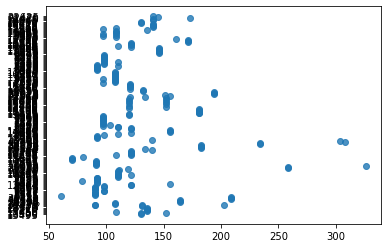

In [ ]:
# Engine size as potential predictor variable of price
import seaborn as sns
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [ ]:
import numpy as np


sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

#### Positive linear relationship:
As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.

Engine size seems like a pretty good predictor of price, since the regression line is almost a perfectly diagonal line.

### Negative linear relationship

In [ ]:
# Highway mpg as a potential predictor variable of price
sns.regplot(x="highway-mpg", y="price", data=df)
#plt.ylim(0,)

#### Negative linear relationship:
As the highway-mpg goes up, the price goes down: this indicates an inverse/ negative relationship between these two variables.

Highway mpg could potentially be a predictor of price.

### Weak Linear Relationship

In [ ]:
# Peak rpm as a predictor variable of price
sns.regplot(x="peak-rpm", y="price", data=df)

#### Weak linear relationship:
Peak rpm does not seem like a good predictor of price at all, since the regression line is close to horizontal.
Also, the data points are very scattered and far from the fitted line, showing that there is a lot of variability and so it is not a reliable variable.

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<b> Find the correlation  between x="stroke", y="price".
<br>Hint: if you would like to select those columns  use the following syntax: df[["stroke","price"]]</bbr>  </b>
</div>

 <div align="right">
<a href="#q3a" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3a" class="collapse">
```
The correlation is 0.0823, the non-diagonal elements of the table.
code:df[["stroke","price"]].corr()
```
</div>

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 b): </h1>

<b> Given the correlation results between "price" and "stroke"  do you expect linear regression to perform well. Verify your results using the function "regplot()".</bbr>  </b>
</div>

  <div align="right">
<a href="#q3b" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3b" class="collapse">
```
There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.  We can see this use "regplot" to demonstrate this.

Code: sns.regplot(x="stroke", y="price", data=df)
```
</div>


## Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories.
The categorical variables can have the type "object" or "int64".

A good way to visualize categorical variables is by using boxplots.

In [ ]:
# body-style
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories overlap too much, and so body-style would not be a good predictor of price.

In [ ]:
# engine-location
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

In [ ]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs and so drive-wheels could potentially be a predictor of price.

## 3. Descriptive Statistical Analysis

Let's first take a look at the variables by utilizing a description method.

The "describe" function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:
- the count of that variable,
- the mean,
- the standard deviation (std),
- the minimum value,
- the IQR (Interquartile Range: 25%, 50% and 75%), and
- the maximum value.

The default setting of "describe" skips categorical variables, but we can still do basic analysis on them using describe by passing it as a parameter.

In [ ]:
# summary statistics using pandas method
df.describe()

In [ ]:
df.describe(include=['object'])

Immediately we see that certain categorical variables would be very poor predictors because they are dominated by a single category. Fuel-type, for example, is almost always gas. Another poor predictor is engine-location. Aspiration and engine-type may also be poor predictors.

### Value Counts

Value-counts is a good way of understanding how many units of each characteristic/variable we have.

In [ ]:
# drive-wheels as variable
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'


In [ ]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

As we can tell from looking at the value counts of the engine location, this would not be a good predictor variable for price, since we only have 3 cars with a rear engine and 198 with front engine, so it is skewed. Thus, we are not able to draw any conclusions about the engine location.

## 4. Basic of Grouping

The groupby function groups the data by different categories of one variable, and analysis can be done on data of an entire category. This allows us to see how one variable affects another more clearly.

You can group by one variable. For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels

In [ ]:
df['drive-wheels'].unique()

If we want to know, on average, which type of drive wheel is most valuable, we can group drive wheels and then average them:

In [ ]:
# grouping results
df_group_one=df[['drive-wheels','body-style','price']]
df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are around the same in price.

You can also group by multiple variables.

For example, let's group by both "drive-wheels" and "body-style".

This groups the dataframe by the unique combinations of these two variables.

In [ ]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. Use the pivot function to create a pivot table from the groups.

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [ ]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

Often, we won't have data for some of the pivot cells. This is not good for what we will do later. We will fill these missing cells with the value 0, but any other value could potentially be used as well.

In [ ]:
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  4 : </h1>

<b> Use the "groupby" function to find the average "price" of each car based on "body-style" ?  </b>
</div>

<div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q4" class="collapse">
```
df[['price','body-style']].groupby(['body-style'],as_index= False).mean()
```
</div>


## 5. Correlation and Causation

**Correlation**: a measure of the extent of interdependence between variables.

**Causation**: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Data science tend to be better at finding correlation than finding causation.

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

### Variables: Drive Wheels and Body Style vs Price

In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

This is a heatmap, which plots the target variable (price) as we vary two other variables (drive-wheel and body-style). This allows us to visualize how price is related to drive-wheel and body-style, as well as see if drvie-wheel and body-style are themselves related to each other.
The default labels convey no useful information to us. Let's change that:

In [ ]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Visualization is very important in data science, and Python visualization packages provides great freedom. We will go more in-depth in a separate Python Visualizations course

The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?".

In order to get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

## Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
- **1**: total positive linear correlation,
- **0**: no linear correlation, the two variables most likely do not affect each other
- **-1**: total negative linear correlation.

**P-value**:
What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the
- p-value is < 0.001 we say there is strong evidence that the correlation is significant,
- p-value is < 0.05, there is moderate evidence that the correlation is significant,
- p-value is < 0.1, there is weak evidence that the correlation is significant, and
- p-value is > 0.1, there is no evidence that the correlation is significant.

In [ ]:
from scipy import stats

### Wheel-base vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

##### Conclusion:
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

### Horsepower vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

##### Conclusion:

Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

### Length vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

##### Conclusion:
Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

### Width vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-weight vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

##### Conclusion:
Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

### Engine-size vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

##### Conclusion:
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

### Bore vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

##### Conclusion:
Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

### City-mpg vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

##### Conclusion:
Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

### Highway-mpg vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

## 6. ANOVA

### ANOVA: Analysis of Variance
This is a statistical method used to test whether there is significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviates from the assumption, and reports it as the F-test score. A larger score means a larger difference between the means.

**P-value**: we already saw this when calculating Pearson correlation. P-value tells how statistically significant is our calculated score value

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a large F-test score and a small p-value.

### Drive Wheels

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

In [ ]:
grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

In [ ]:
grouped_test2.get_group('4wd')['price']

In [ ]:
# this package has already been imported previously
# from scipy import stats

#### All three groups together: 4wd, fwd, and rwd

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

This is a great result, with a large F test score showing strong correlation and a P value almost 0 showing almost certain statistical significance. But does this mean all 3 tested groups are all this highly correlated?

#### Separately: fwd and rwd

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

#### 4wd and rwd

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

#### 4wd and fwd

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])

print("ANOVA results: F=", f_val, ", P =", p_val)

## Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

# About the Authors:  

This notebook written by [Mahdi Noorian PhD](https://www.linkedin.com/in/mahdi-noorian-58219234/) ,[Joseph Santarcangelo PhD]( https://www.linkedin.com/in/joseph-s-50398b136/), Bahare Talayian, Eric Xiao, Steven Dong, Parizad , Hima Vsudevan and [Fiorella Wenver](https://www.linkedin.com/in/fiorellawever/).


Copyright &copy; 2017 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).


 <div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/DA0101EN_NotbookLink_bottom"><img src = "https://ibm.box.com/shared/static/cy2mwm7519t4z6dxefjpzgtbpi9p8l7h.png" width = 750, align = "center"></a>
 <h1 align=center><font size = 5> Link</font></h1>